# **Smart-UJ UAQUE**
## Documento entendimiento de datos</br>
Este documento busca exponer un primer acercamiento a los datos proveídos por la biblioteca. Procederemos a presentar la carga de los datos. Información básica de los archivos recibido. Descripción de las columnas para el dataset de préstamo de la biblioteca Alfonso Borrero Cabal S.J. Presentaremos gráficos que permitirán visualizar la relación entre los tipos de datos encontrados, junto a una breve descripción de las inferencias que se pueden realizar sobre estos. Evaluaremos la calidad de los datos con respecto al formato, estandarización y volumen de datos faltantes.

Posteriormete se realizará una limpieza tanto de filas como columnas para trabajar solo con los datos necesarios para los algoritmos de agrupamiento y recomendación.

**Integrantes:**</br>
Johan Ortegón </br>
Juan Angarita </br>
Jorge Salgado </br>
Daniel Tibaquira </br></br>
**Directora de Proyecto de Grado:** </br>
Viky Arias </br>

# Carga de datos

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

Comenzamos importando la librerias necesarias para cargar los datos y hacer su respectiva exploración.<br/>

* Pandas: Permite almacenar los datos en dataframes(matrices) y operación entre las celdas.<br/>

* Plt(matplotlib.pyplot) y sns(seaborn): permiten visualizar los datos a través de diferentes gráficos. 



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Importamos el dataset y los guardamos dentro de un dataframe.<br/>
* datasetPrestamos: Corresponde a toda la información de prestamos de la Biblioteca Alfonso Borrero Cabal, S.J. (biblioteca general) entre los años 2018 y 2021. <br/>

In [6]:
path =("https://www.dropbox.com/s/wpslbav7qanv4qt/PRESTAMOS-BGENERAL.json?dl=1")
datasetPrestamos = pd.read_json(path)

Previo a cualquier tipo de análisis eliminaremos los datos no relacionados con la biblioteca Alfonso Borrero Cabal S.J. 

In [7]:
datasetPrestamos = datasetPrestamos[datasetPrestamos.Biblioteca == 'B-GENERAL']
datasetPrestamos = datasetPrestamos[datasetPrestamos["Biblioteca Transacción"] == 'B-GENERAL']

Hacemos una primera visualización de los datos el archivo.

In [8]:
display(datasetPrestamos.head(3))

,row ID,Mes,Fecha,Hora,Transacción,Biblioteca Transacción,ID Ítem,Numero de Ubicación,Dewey,Biblioteca,Ubicación,Tipo de ítem,Llaves,Perfil,Categoría 1,Programa,Facultad,ID de usuario ok
0,Row0,Enero,E201901091614570008R,16,Prestamos CyP,B-GENERAL,80000005327627,720.98 A71S,720,B-GENERAL,COL-GRAL-2,LIBRO,866245,A-EGRESADO,ARQUI,CARRERA DE ARQUITECTURA,Arquitectura y Diseño,c361c772cd0220bb16dcfb2ad803e4903334ab94
1,Row1,Enero,E201901091615000008R,16,Prestamos CyP,B-GENERAL,80000001191496,720.9861 A71,720,B-GENERAL,COL-GRAL-2,LIBRO,309945,A-EGRESADO,ARQUI,CARRERA DE ARQUITECTURA,Arquitectura y Diseño,c361c772cd0220bb16dcfb2ad803e4903334ab94
2,Row2,Enero,E201901101646030036R,16,Prestamos CyP,B-GENERAL,80000004979759,540 CH15Q 2010,540,B-GENERAL,COL-GRAL-3,LIBRO,822727,A-EGRESADO,ARQUI,CARRERA DE ARQUITECTURA,Arquitectura y Diseño,87b0e5a61ed712ddfaf5d478ad68c87c825997e9


# 1. Reporte de recolección de datos 
En esta sección exponemos las principales características de los archivos (Propietario, Formato original, URL, Fecha de última actualziación, Tamaño del archivo, Nombre del almacenamiento físico, restricciones de uso y Número de atributos) junto con una breve descripción.
* **Nombre conjunto de datos:** PRESTAMOS-BGENERAL-2019-2020-2021
    * **Descripción:** ofrece información detallada de los prestamos realizados por parte de la comunidad educativa del material bibliográfico procedente de Biblioteca Alfonso Borrero Cabal S.J.. Ofrece información general del estudiante y detalles del préstamo.
    * **Propietario:** Andrés Echavarria​
    * **Formato original:** Texto Plano
    * **URL u origen:** Proporcionados para el Proyecto Smart-UJ
    * **Última actualización:** 24/09/2021
    * **Tamaño orginal:** 141MB
    * **Alamcenamiento físico:** Servidor Oracle 11G
    * **Restricciones de uso:** Solo se utilizarán los datos de la biblioteca general.
    * **Número de atributos:** 18.



# Pre-Limpieza
En esta sección elaboramos una descripción detallada de los atributos (columnas) que contienen los archivos.Así mismo se mostrarán gráficas que nos ayudarán a entender mejor la distribución de los datos. 

Comenzamos creando algunas funciones auxiliares para describir los datos y gráficarlos. 

In [9]:
def descripcion(dataset, nombre):
  nulos = len(dataset.loc[dataset[nombre].isnull()])
  print("Número de datos nulos:", nulos)
  unicos = len(dataset[nombre].unique())
  print("Número de datos únicos:", unicos)
  tipo = type(dataset[nombre][0])
  print("Tipo de dato:", tipo)
  print("Ejemplo:", dataset[nombre][0])

In [10]:
def histograma(dataset,nombre):
  plt.figure(figsize=(25, 10))
  plt.title("Frecuencia de préstamos por " + nombre)
  plt.xlabel(nombre)
  plt.ylabel("Frecuencia")
  dataset[nombre].value_counts().plot(kind='bar') 

In [11]:
def frecuencias(dataset,nombre):
  table = (dataset[nombre].value_counts(normalize = True) * 100).to_frame()
  table.columns = ['Procentaje (%)']
  table.columns.name = nombre
  display(table)

Mostramos el número de filas y columnas que componen el archivo correspondiente a los prestamos de los años  2018 - 2021

In [12]:
print("Número de Filas: ", datasetPrestamos.shape[0])
print("Número de Columnas: ", datasetPrestamos.shape[1])

Número de Filas:  525869
Número de Columnas:  18


In [13]:
datasetPrestamos.columns

Index(['row ID', 'Mes', 'Fecha', 'Hora', 'Transacción',
       'Biblioteca Transacción', 'ID Ítem', 'Numero de Ubicación', 'Dewey',
       'Biblioteca', 'Ubicación', 'Tipo de ítem', 'Llaves', 'Perfil',
       'Categoría 1', 'Programa', 'Facultad', 'ID de usuario ok'],
      dtype='object')

In [14]:
dataset = datasetPrestamos

### Col: row ID
**Descripción**: ID único de cada prestamo realizado en la biblioteca.

In [15]:
col = "row ID"
descripcion(dataset,col)

Número de datos nulos: 0
Número de datos únicos: 525869
Tipo de dato: <class 'str'>
Ejemplo: Row0


### Col: Mes
**Descripción**: Mes en el que se realizó el prestamo del material. Se puede entender como un atributo derivado de fecha.

In [16]:
col = "Mes"
descripcion(dataset,col)

Número de datos nulos: 0
Número de datos únicos: 12
Tipo de dato: <class 'str'>
Ejemplo: Enero


In [17]:
frecuencias(dataset,col)

Mes,Procentaje (%)
Febrero,13.108398
Marzo,11.594903
Abril,9.834579
Mayo,9.177000
Agosto,9.127749
Septiembre,8.912676
Enero,8.226383
Octubre,8.192535
Noviembre,7.143604
Julio,7.110706


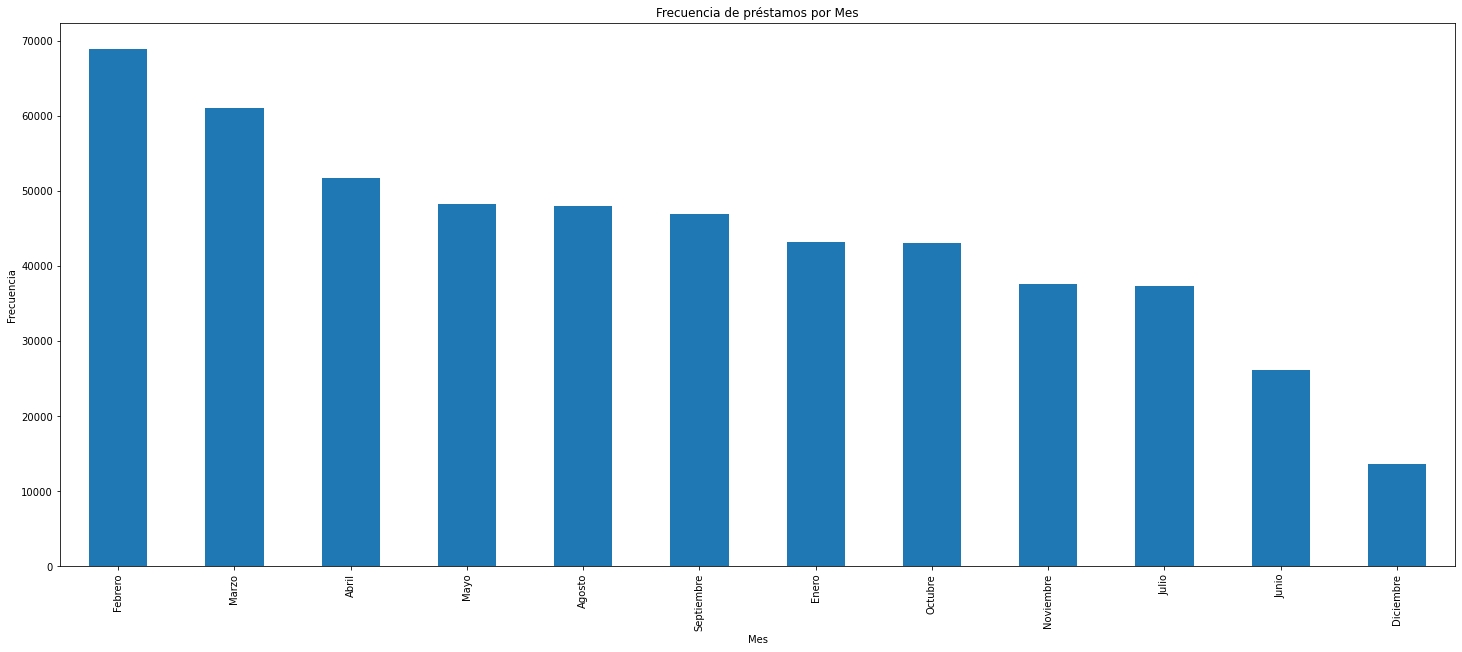

In [18]:
histograma(dataset,col)

**Análisis:**Podemos apreciar que Febrebro (**13.1%**) es el mes con la mayor cantidad de prestamos registrados, seguido por Marzo (**11.57%**) y Abril (**9.82%**), por lo que en inicio del año es el que más transacciones presenta (probablemente relacionado con el inicio de los ciclos académicos, según experto del negocio)

### Col: Fecha
**Descripción:** Indica la fecha en la cual se realizó el prestamo. 

In [19]:
 import datetime

In [20]:
datasetPrestamos['Fecha'][0]

'E201901091614570008R '

Convertimos la fecha a un formato estandar para el cual posteriormente se puedan derivar otros atributos. 

In [21]:
fechasFormat = datasetPrestamos['Fecha'].apply(lambda x: x[1:15])
fechasSave = fechasFormat.apply(lambda x: datetime.datetime.strptime(x, '%Y%m%d%H%M%S'))
datasetPrestamos['Fecha'] = fechasSave
datasetPrestamos['Fecha'][0]

Timestamp('2019-01-09 16:14:57')

In [22]:
col = "Fecha"
descripcion(dataset,col)

Número de datos nulos: 0
Número de datos únicos: 413955
Tipo de dato: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Ejemplo: 2019-01-09 16:14:57


In [23]:
datasetPrestamos['Fecha'].describe(datetime_is_numeric=True)

count                           525869
mean     2019-02-15 09:11:42.152404992
min                2018-01-01 03:32:09
25%                2018-06-18 19:41:17
50%                2019-01-29 18:04:56
75%                2019-08-23 12:38:38
max                2021-06-30 23:38:51
Name: Fecha, dtype: object

**Análisis:**El dataset tiene como primera fecha el '2018-01-01' y como última fecha de actualización '2021-06-30'. Como se puede apreciar por los percentiles la mayoría de los datos pertenecen a los años 2019 y 2018.

### Col: Hora
**Descripción:** Hora en la que se realizó la transacción.

In [24]:
col = "Hora"
descripcion(dataset,col)

Número de datos nulos: 0
Número de datos únicos: 29
Tipo de dato: <class 'numpy.int64'>
Ejemplo: 16


In [25]:
datasetPrestamos['Hora'].unique()

array([16, 13, 11, 15, 19, 20,  8,  9, 10, 12, 14, 17, 18,  6, 21, 23,  7,
        0,  1, 22,  4,  5,  3, 30, 24, 26, 25, 28, 27], dtype=int64)

Notamos que hay datos anormales en las horas(mayores a 24). Estos datos se cambiarán por datos nulos 

In [26]:
datasetPrestamos.loc[datasetPrestamos.Hora > 24, 'Hora'] = None


In [27]:
nulos = len(datasetPrestamos.loc[datasetPrestamos.Hora.isnull()])
print("Número de valores nulos:",nulos )

Número de valores nulos: 467


In [28]:
datasetPrestamos['Hora'].describe()

count    525402.000000
mean         13.373421
std           4.612476
min           0.000000
25%          10.000000
50%          13.000000
75%          17.000000
max          24.000000
Name: Hora, dtype: float64

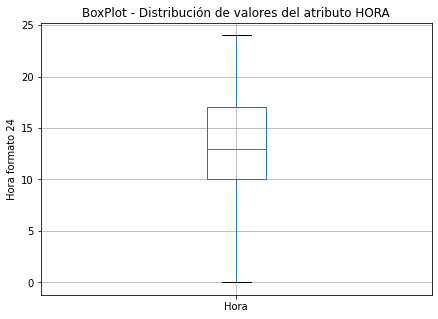

In [29]:
plt.figure(figsize=(7, 5))
plt.title("BoxPlot - Distribución de valores del atributo HORA")
plt.ylabel("Hora formato 24")
boxplot = datasetPrestamos.boxplot(column = ['Hora'])

**Análisis:**Podemos apreciar que la hora promedio en la que se realizan los préstamos es la **1:36 PM**. El máximimo corresponde a 24 y el mínimo a 0 dado que este dato se almacena en sistema de 24 horas. Tras eliminar los valores ilogicos, podemos notar que no hay valores atípicos.

### Col: Transacción
**Transacción**: describe la forma en la cual se realizó la transacción. 

Categoría(nombre)   | Descripción
--------------------|------------------
Javemovil| Préstamo realizado a través de la aplicación de la universidad JaveMovil.
M. Autopréstamo| La transacción se realizó a través de una de las máquinas de autopréstamos de la biblioteca.
Préstamos CyP| Préstamos realizados en el punto de cirulación y préstamo de la biblioteca.
Renovación CyP| Renovaciones de préstamos realizadas en el punto de cirulación y préstamo de la biblioteca.
Renovación M. Autopréstamo| Renovaciones de préstamos realizadas en la máquina de autopréstamos de la biblioteca.
Renovación Web (Catálogo)|Renovaciones de préstamos realizadas a través del portal web de la biblioteca.

In [30]:
col = "Transacción"
descripcion(dataset,col)

Número de datos nulos: 0
Número de datos únicos: 6
Tipo de dato: <class 'str'>
Ejemplo: Prestamos CyP


In [31]:
frecuencias(dataset,col)


Transacción,Procentaje (%)
Prestamos CyP,47.703516
Renovación Web (Catálogo),38.434097
Javemovil,7.241537
M. Autopréstamo,3.766527
Renovación CyP,2.527436
Renovación M. Autopréstamo,0.326887


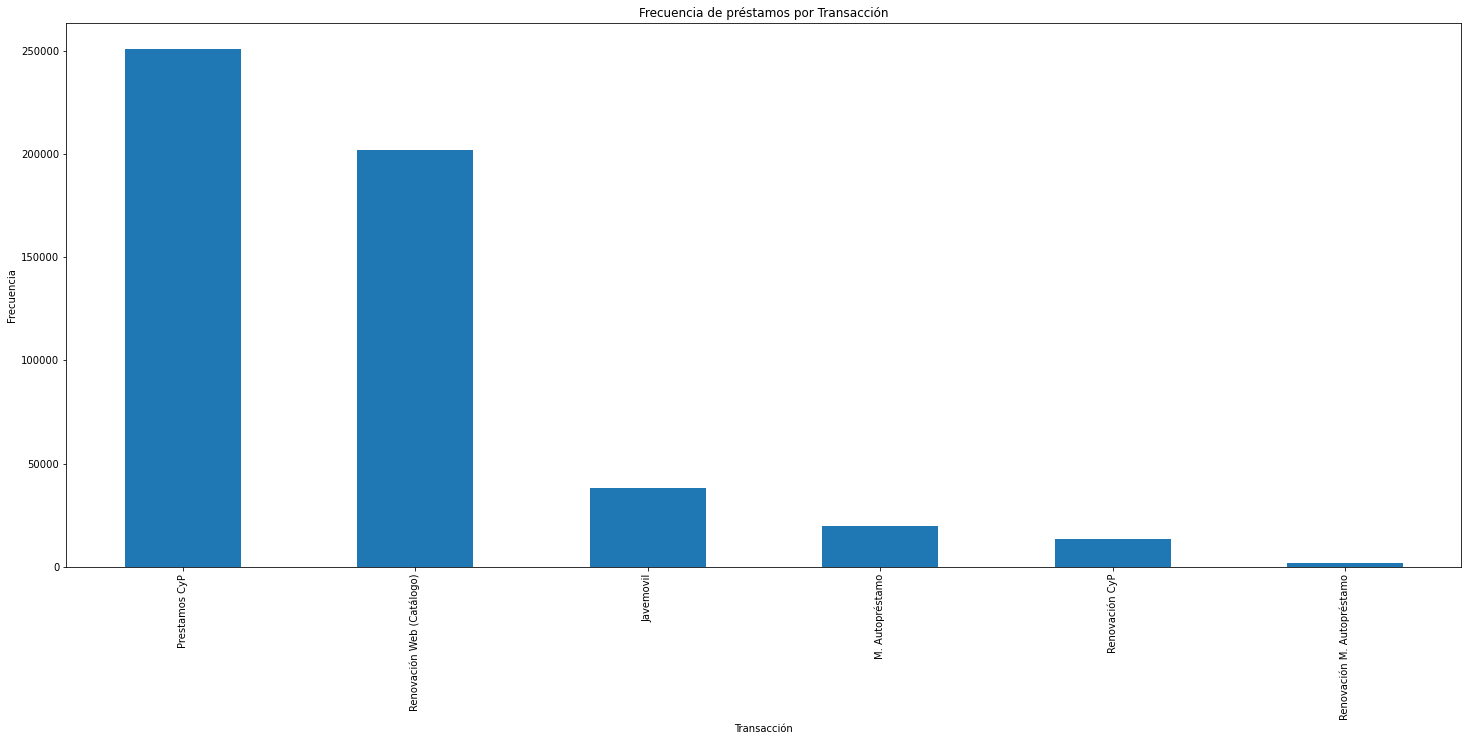

In [32]:
histograma(dataset,col)

**Análisis:**Podemos notar que la mayoría de prestamos se realizan a través se realizan en los puntos de prestamos de la biblioteca. Así mismo que la renovación web es muy popular entre la comunidad educativa. Otros medios como la aplicación de javemovil o el autoprestamo no se usan de manera masiva.

### Col: Biblioteca Transacción
**Descripción:** Lugar al que pertenece la transacción. Tiene un único valor: B-GENERAL.

In [33]:
col = "Biblioteca Transacción"
descripcion(dataset,col)

Número de datos nulos: 0
Número de datos únicos: 1
Tipo de dato: <class 'str'>
Ejemplo: B-GENERAL


### Col: ID Ítem
**Descripción:** es el ID único que tiene cada ítem de la biblioteca. Si un libro tiene varias copias en la biblioteca, cada copia tiene su propio ID.

In [34]:
col = "ID Ítem"
descripcion(dataset,col)

Número de datos nulos: 0
Número de datos únicos: 102370
Tipo de dato: <class 'str'>
Ejemplo: 80000005327627


### Col: Numero de Ubicación
**Descripción:** Ubicación del ítem a partir del sistema Dewey que usa la biblioteca.

In [35]:
col = "Numero de Ubicación"
descripcion(dataset,col)

Número de datos nulos: 0
Número de datos únicos: 132751
Tipo de dato: <class 'str'>
Ejemplo: 720.98 A71S


In [36]:
datasetPrestamos['Numero de Ubicación']

0            720.98 A71S
1           720.9861 A71
2         540 CH15Q 2010
3               512 B151
4               712 M17E
               ...      
543896        370.1 E47E
543897        370.1 CH65
543898      809 H182 V.1
543899      658.0076 G51
543900         833 Z83SN
Name: Numero de Ubicación, Length: 525869, dtype: object

**Análisis:**Como se puede ver los valores aunque dispersos siguen una misma estructura. Con este dato podemos enteder de manera sencilla el piso en el que se encuentra el material. 
La siguiente tabla muestra la equivalencia entre los valores númericos y los pisos de la biblioteca:

Categoría(nombre)   | Descripción
--------------------|------------------
No. 800-90| Piso 0 - Literatura,Literatura Infantil y Juvenil.
No. 600-799| Piso 2
No. 330-599| Piso 3 - Colección de Jurisprudencia
No. 000-329| Piso 4
Colección de Referencia| Piso 1

Este dato nos puede servir para dar la localización del ítem una vez dada la recomendación. 

### Col:Dewey
**Dewey:**El dewey es un sistema númerico para la clasificación de material en bibliotecas a partir de temáticas. Aunque es un sistema generalizado y usado a nivel mundial, cada biblioteca lo personaliza para su beneficio. 

In [37]:
col = "Dewey"
descripcion(dataset,col)

Número de datos nulos: 14
Número de datos únicos: 120
Tipo de dato: <class 'str'>
Ejemplo: 720


In [38]:
datasetPrestamos['Dewey'].unique()

array(['720', '540', '510', '710', '740', '810', '820', '330', '860',
       '690', '620', '150', '940', '570', '840', '800', 'Tesis', '300',
       '350', '380', '130', 'Mapa', '340', '980', 'Revista', 'Video',
       '700', 'Interbibliotecario', '360', '920', '750', '890', '420',
       '650', 'Partitura', '0', '910', '680', '120', '370', '610', '450',
       '790', '110', 'Grabación Sonora', '730', '580', '520', '590',
       '930', '850', '500', '880', '900', '320', '240', '410', '70',
       '490', '190', '260', '290', '970', 'Folleto', '770', '550', '530',
       '630', '560', '670', '640', '830', '950', '440', '20', '250',
       '660', '760', '170', '600', '780', '230', '140', '390', '180',
       '270', '870', '430', '100', '10', '160', '220', '210', '470',
       '400', '460', '60', '200', '480', '960', '310', '280', None,
       'Tablet', 'Diapositiva', 'Xbox', '50', '90', 'Juego', '30',
       'Video Juego', 'GRABACIÓN SONORA', 'TESIS', 'VIDEO', 'PARTITURA',
       'INTERBI

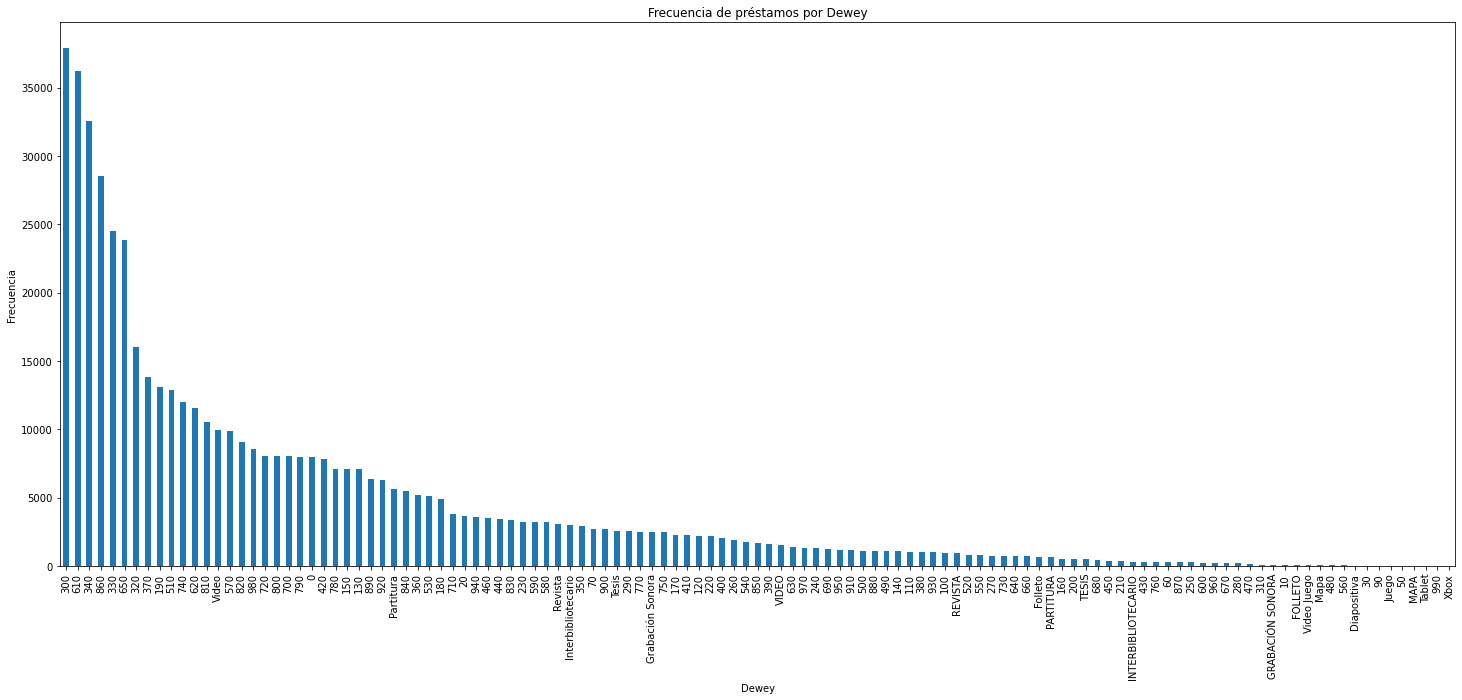

In [39]:
histograma(dataset,col)

**Análisis:**Los deweys en el dataset llegan hasta la decena(en comparación a los sistemas tradicionales que llegan hasta la unidad). Así mismo encontramos Deweys no númericos los cuales señalan el material bibliográfico diferentes a libros con los cuales cuenta la biblioteca y ofrece a la comunidad educativa. 

El conjunto de deweys no númericos es el siguiente: {
* Categoría(nombre)   Descripción
* Video
* Partitura
* Revista
* interbibliotecario
* Grabación Sonora
* Revista 
* Partitura 
* Folleto 
* Diapositiva 
* Mapa 
* Juego 
* Tablet

}
De estos ítems el único que no hace referencia a un tipo de material especial es "interbibliotecario" que hace referencia a un tipo de prestamo, donde el material prestado es solicitado a otra biblioteca.

Las categorías asociadas al Dewey se pueden consultar en el siguiente enlace: https://www.oclc.org/content/dam/oclc/dewey/resources/summaries/deweysummaries.pdf

### Col: Biblioteca
**Descripción:** Lugar al que pertenece el material. Dado que solo se trabaja con el material bibliográfico de la biblioteca general esta columna tiene un único dato. 

In [40]:
col = "Biblioteca"
descripcion(dataset,col)

Número de datos nulos: 0
Número de datos únicos: 1
Tipo de dato: <class 'str'>
Ejemplo: B-GENERAL


### Col:Ubicación
**Descripción:** Ubicación del material bibliográfico  al interior de la biblioteca. Es el nombre del lugar físico. 


In [41]:
col = "Ubicación"
descripcion(dataset,col)

Número de datos nulos: 0
Número de datos únicos: 48
Tipo de dato: <class 'str'>
Ejemplo: COL-GRAL-2


In [42]:
datasetPrestamos["Ubicación"].unique()

array(['COL-GRAL-2', 'COL-GRAL-3', 'COL-GRAL-0', 'COL-GRAL-4',
       'SALA-TESIS', 'REFERENCIA', 'HEMEROTECA', 'AUDIOVISUA',
       'COL-ALTERN', 'P-INTERBIB', 'SALA-MUSIC', 'LIT-INFANT',
       'LIT-JUVENI', 'RESERVA-2', 'DEPOSITO1', 'RESERVA-3', 'JURISPRUDE',
       'PERDIDO', 'TABLET', 'PRESTADO', 'SALAEXPO', 'VALIOSOS',
       'EN-ENCUADE', 'RESERVADO', 'RESERVA', 'RESERVA-0', 'SALA-VIDEO',
       'SALAPISOMU', 'SALAPISO', 'SALAEXPO-0', 'SALAEXPO-2', 'NOVEDADES',
       'CATALOGA', 'RESERVA-4', 'SALA-VIRTU', 'PAGOXOTRO', 'REPOSICION',
       'SALAPISO-2', 'DESCARTADO', 'DEPOSITO4', 'LIT-INFANTIL',
       'DEPOSITO3', 'LABORAT-BI', 'TESIS-REST', 'SALAESCRIT',
       'COLEC-GRAL', 'EN-LINEA', 'SALAEXPO-4'], dtype=object)

La descripción de cada uno de los valores de este atributo se describen en la siguiente tabla: 

Categoría(nombre)   | Descripción
--------------------|------------------
Colección de Referencia| Piso 1
AUDIOVISUA| Sótano 2 (alberga videos, blu-ray, videos beta y vhs, películas).
CATALOGA| Indica que el registro está en proceso de Catalogación y aún no está disponible para préstamo
COL-ALTERN| Indica que son ítems que se enviarán a Depósito
COL-GRAL-0, COL-GRAL-1, COL-GRAL-2, COL-GRAL-3, COL-GRAL-4| Ubicaciones de las Colecciones de los pisos 0 al 4.
DEPÓSITO| Ítems que no están disponibles en la Colección
HEMEROTECA| Ubicación donde se encuentran las Revistas. Sótano 2
JURISPRUDE| Colección del área de Ciencias Jurídicas
LIT-INFANT| Literatura Infantil
LIT-JUVENI| Literatura Juvenil.
PERDIDO| Ítems reportados como perdidos.
P-INTERBIB| Significa Préstamos Interbibliotecarios. Estos ítems no hacen parte de la Biblioteca General.<br/> Son ítems solicitados a otras bibliotecas en calidad de préstamo.
REFERENCIA| Colección de Referencia Piso 1
RESERVA-2, RESERVA-3| Ítems solicitados como Reserva Académica de los piso 2 y 3.
SALA-MUSIC| Sala de Música
SALAPISOMU| Consulta en Sala de Música.
SALA-TESIS| Sala de Tesis. Sótano 2.
VALIOSOS| Colección de Libros Valiosos.

**Análisis:**Al igual que el atributo de "Numero de ubicacion" el atributo "Ubicacion" nos puede servir para ayudar a que el usuario ubique de manera sencilla el material recomendado. 

### Col: Tipo de Ítem
**Descripción:** Describe el tipo de material. 

In [43]:
col = "Tipo de ítem"
descripcion(dataset,col)

Número de datos nulos: 0
Número de datos únicos: 25
Tipo de dato: <class 'str'>
Ejemplo: LIBRO


In [44]:
datasetPrestamos["Tipo de ítem"].unique()

array(['LIBRO', 'LITERATURA', 'TESIS', 'REFERENCIA', 'MAPA', 'REVISTA',
       'VIDEO', 'P-INTJAVER', 'PARTITURA', 'GRAB-SONOR', 'FOLLETO',
       'RESERVA', 'TABLET', 'RESERVAVID', 'CD-ROM', 'INVESTIGA',
       'MAT-GRAFI', 'JUEGO', 'DAõNA-PERDI', 'DIAPOSITIV', 'XBOX',
       'PELICULA', 'OBJ-TRIDI', 'DVD-ROM', 'VIDEOJUEGO'], dtype=object)

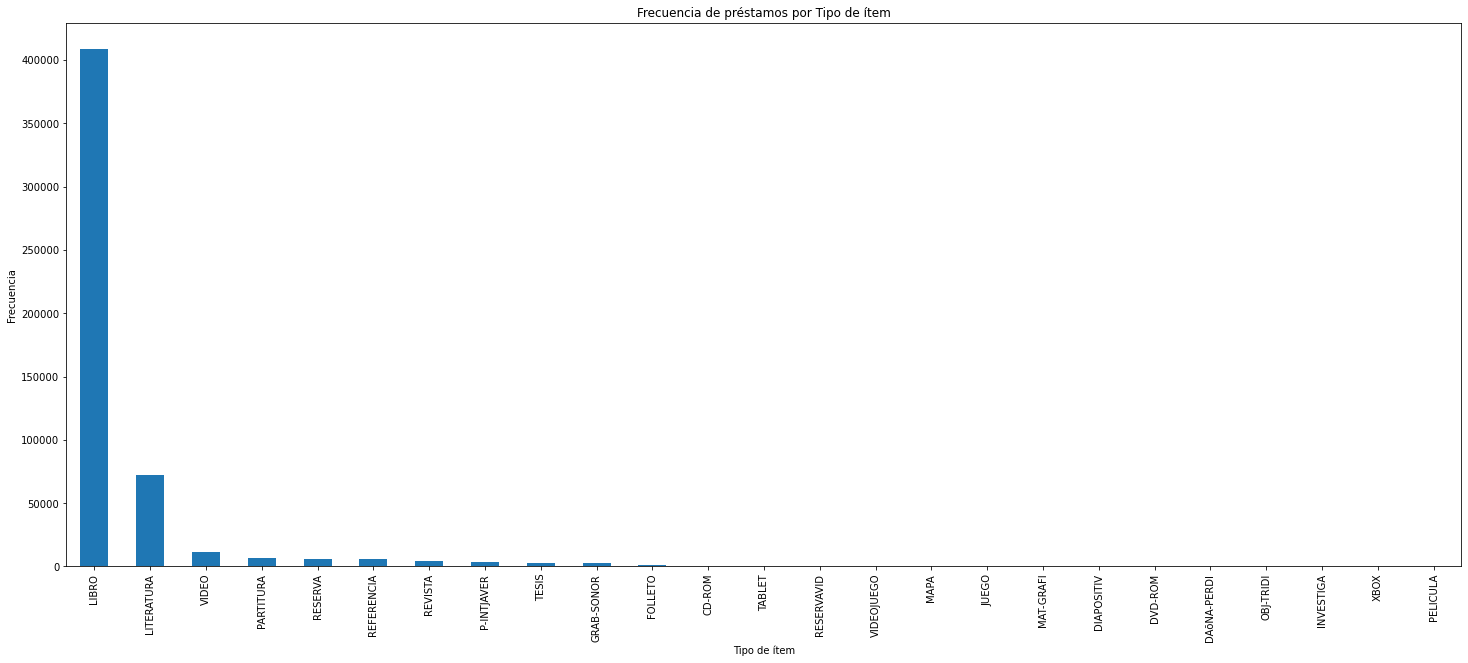

In [45]:
histograma(dataset,col)

In [46]:
frecuencias(dataset,col)


Tipo de ítem,Procentaje (%)
LIBRO,77.773552
LITERATURA,13.786704
VIDEO,2.172975
PARTITURA,1.193643
RESERVA,1.147054
REFERENCIA,1.058819
REVISTA,0.785367
P-INTJAVER,0.638942
TESIS,0.588740
GRAB-SONOR,0.490616


**Análisis:**Podemos encontrar que la mayoría del material de la biblioteca están en la categría "Libro" seguido de "Literatura". El resto de categorías no tienen un alto número de prestamos y corresponden en su mayoría a otro tipo de material bibliográfico que presta la biblioteca. Notar los tipos de deweys no númericos están directamente asociados con el tipo de ítem al que pertenecen teniendo el mismo valor en ambas columnas. 

### Col: Llaves
**Descripción:** Las llaves desginan un id a los libros no por copia física sino por el libro en sí. Si un libro tiene varias copias, todas las copias tienen diferente ID más tendrán la misma llave. 

In [47]:
col = "Llaves"
descripcion(dataset,col)

Número de datos nulos: 0
Número de datos únicos: 102171
Tipo de dato: <class 'str'>
Ejemplo: 866245


**Análisis:**Encontramos que hay más de 100.000 ítems diferentes prestados en la biblioteca general. 

### Col: Perfil
**Descripción:** categoría de la persona que realizó el prestamos. 
La siguiente tabla resume las diferentes categorías que tiene esta atributo: 




Categoría  | Descripción
--------------------|------------------
A-EGRESADO| Egresado Afiliado
EP| Estudiante de pregrado
EC| Estudiante de cursos libres
EG| Estudiante de postgrado
ET| Estudiante en Tesis
EJ| Empleado Javeriano
JE| Jesuita
PA| Profesor Ad Honorem
PH| Profesor hora cátedra
PP| Profesor
PM| Profesor medio tiempo
PT| Profesor titular / tiempo completo
UP| Usuario con préstamo
UV| Usuario visitante
UPHUSI| Usuario Hospital San Ignacio

In [48]:
col = "Perfil"
descripcion(dataset,col)

Número de datos nulos: 0
Número de datos únicos: 26
Tipo de dato: <class 'str'>
Ejemplo: A-EGRESADO


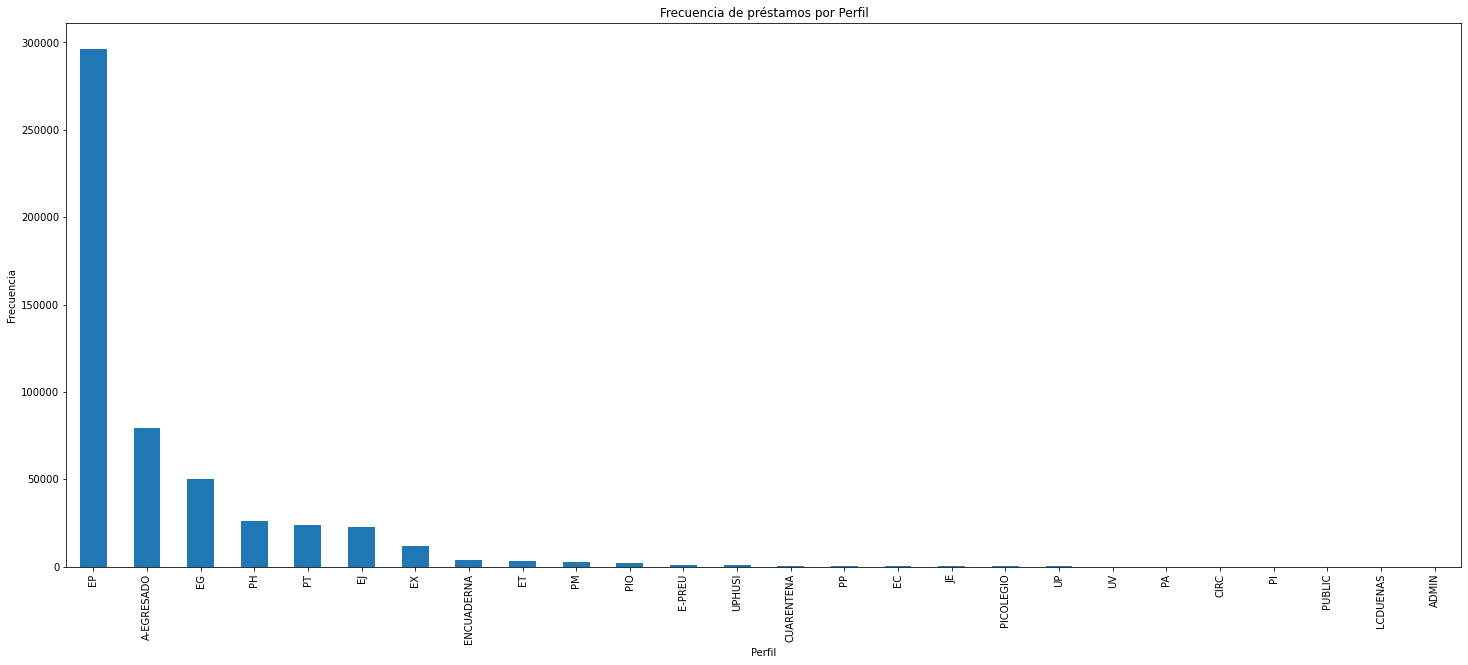

In [49]:
histograma(dataset,col)

In [50]:
frecuencias(dataset,col)


Perfil,Procentaje (%)
EP,56.337795
A-EGRESADO,15.074667
EG,9.572726
PH,4.953135
PT,4.545619
EJ,4.296888
EX,2.231925
ENCUADERNA,0.682109
ET,0.617644
PM,0.519521


**Análisis:**Notamos que la mayoría de prestamos están distribuidos entre los estudiantes(pregrado y posgrado), egresados y profesores(catedra y de planta).

### Col: Categoría 1
**Descripción:** Incluye información relativa a los usuarios. 

In [51]:
col = "Categoría 1"
descripcion(dataset,col)

Número de datos nulos: 0
Número de datos únicos: 483
Tipo de dato: <class 'str'>
Ejemplo: ARQUI


In [52]:
datasetPrestamos["Categoría 1"]

0         ARQUI
1         ARQUI
2         ARQUI
3         ARQUI
4         ARQUI
          ...  
543896    ARTVI
543897    ARTVI
543898    ARTVI
543899    RLINT
543900    MESAL
Name: Categoría 1, Length: 525869, dtype: object

**Análisis:** Este atributo no ofrece información que nos pueda ser útil para los sistemas de recomendación. Logramos encontrar información más detallada sobre la temática de los libros en atributos como Dewey. 

### Col: Programa
**Descripción:** Describe el programa al cuál pertenece la persona.

In [53]:
col = "Programa"
descripcion(dataset,col)

Número de datos nulos: 0
Número de datos únicos: 473
Tipo de dato: <class 'str'>
Ejemplo: CARRERA DE ARQUITECTURA


<AxesSubplot:title={'center':'Frecuencia de préstamos por perfil de usuario'}, xlabel='Perfil de usuario', ylabel='N de préstamos'>

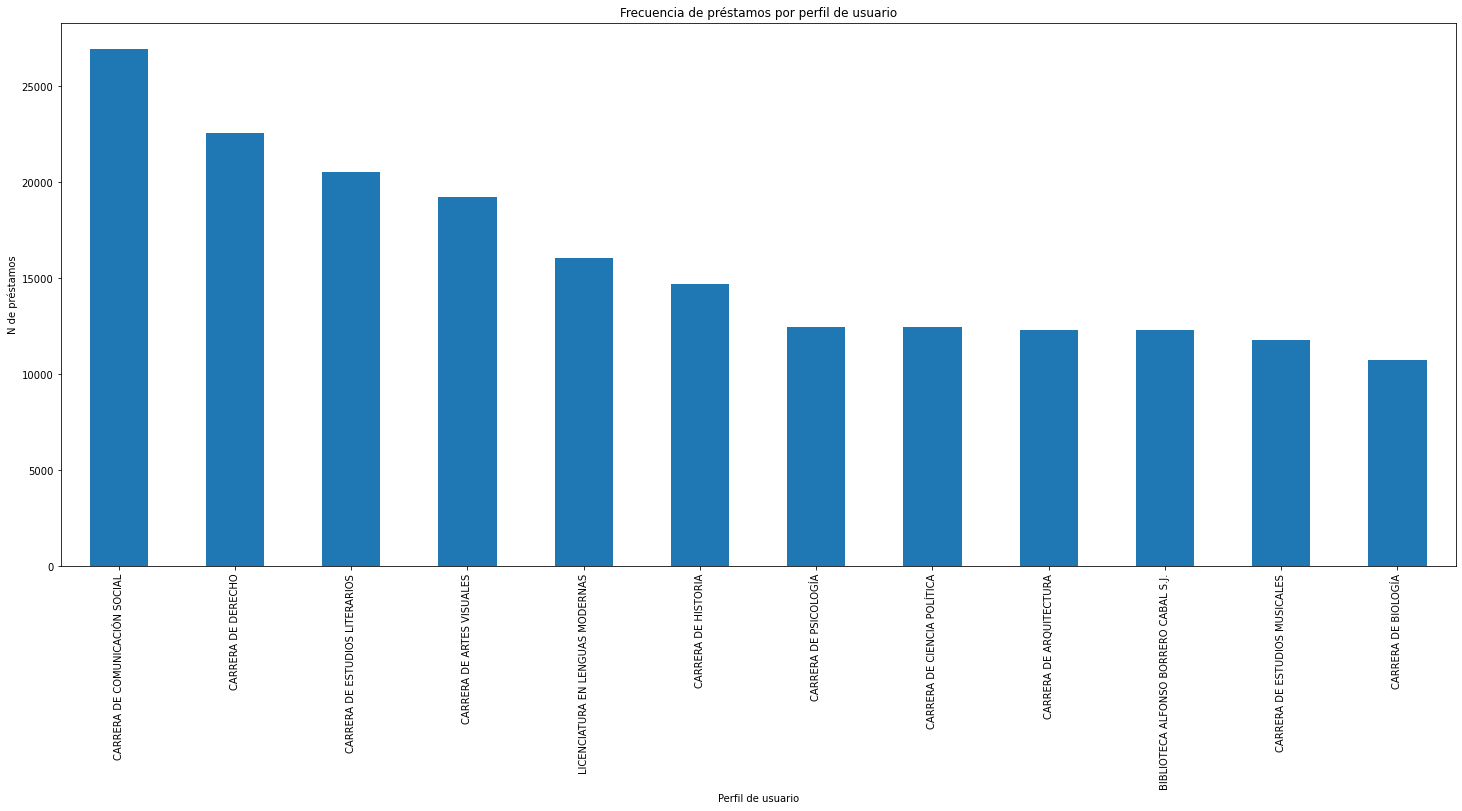

In [54]:
plt.figure(figsize=(25, 10))
plt.title("Frecuencia de préstamos por perfil de usuario")
plt.xlabel("Perfil de usuario")
plt.ylabel("N de préstamos")
datasetPrestamos["Programa"].value_counts()[0:12].plot(kind='bar')

In [55]:
frecuencias(dataset,col)


Programa,Procentaje (%)
CARRERA DE COMUNICACIÓN SOCIAL,5.126372
CARRERA DE DERECHO,4.294225
CARRERA DE ESTUDIOS LITERARIOS,3.904775
CARRERA DE ARTES VISUALES,3.655283
LICENCIATURA EN LENGUAS MODERNAS,3.055704
...,...
ESPECIALIZACIÓN EN DERECHO DE LA COMUNICACIÓN,0.000190
RECTORÍA,0.000190
Estudiantes de Cursos Libres,0.000190
DIRECCION DE SERVICIOS UNIVERSITARIOS --,0.000190


**Análisis:** En primer lugar resaltar que nos encontramos con más de 400 programas educativos entre carreras de pregrado y posgrado que ofrece la PUJ. Encontramos así mismo que las carreraas que realizan mayor cantidad de prestamos en la biblioteca son "Comunicación social" y "Derecho". 

### Col: Facultad
**Descripción:** Carrera a la cual pertenece la persona que realizó el prestamo.

In [56]:
col = "Facultad"
descripcion(dataset,col)

Número de datos nulos: 0
Número de datos únicos: 48
Tipo de dato: <class 'str'>
Ejemplo: Arquitectura y Diseño


In [57]:
datasetPrestamos["Facultad"].unique()

array(['Arquitectura y Diseño', 'ARQUITECTURA Y DISEÑO', 'Artes', 'ARTES',
       'Ciencias', 'CIENCIAS', 'Ciencias Económicas y Administrativas',
       'CIENCIAS ECONÓMICAS Y ADMINISTRATIVAS',
       'Ciencias ECONÓMICAS Y ADMINISTRATIVAS', 'Ciencias Jurídicas',
       'CIENCIAS JURÍDICAS',
       'Ciencias Políticas y Relaciones Internacionales',
       'CIENCIAS POLÍTICAS Y RELACIONES INTERNACIONALES',
       'Ciencias POLÍTICAS Y RELACIONES INTERNACIONALES',
       'Ciencias Sociales', 'CIENCIAS SOCIALES',
       'Comunicación y Lenguaje', 'COMUNICACIÓN Y LENGUAJE',
       'Derecho Canónico', 'DERECHO CANÓNICO', 'Educación', 'EDUCACIÓN',
       'Empleado', 'Enfermería', 'ENFERMERÍA',
       'Estudios Ambientales y Rurales', 'ESTUDIOS AMBIENTALES Y RURALES',
       'Filosofía', 'FILOSOFÍA', 'Ingeniería', 'INGENIERÍA', 'Medicina',
       'MEDICINA', 'Odontología', 'ODONTOLOGÍA', 'Psicología',
       'PSICOLOGÍA', 'Teología', 'TEOLOGÍA', 'Usuarios Especiales',
       'Cursos Libres',

Notamos que hay un problema de integridad de los datos. Se corregirá este defecto para tener un mejor entendimiento de los datos.

In [58]:
#Pasamos todo a minuscula
datasetPrestamos["Facultad"] = datasetPrestamos["Facultad"].str.lower();

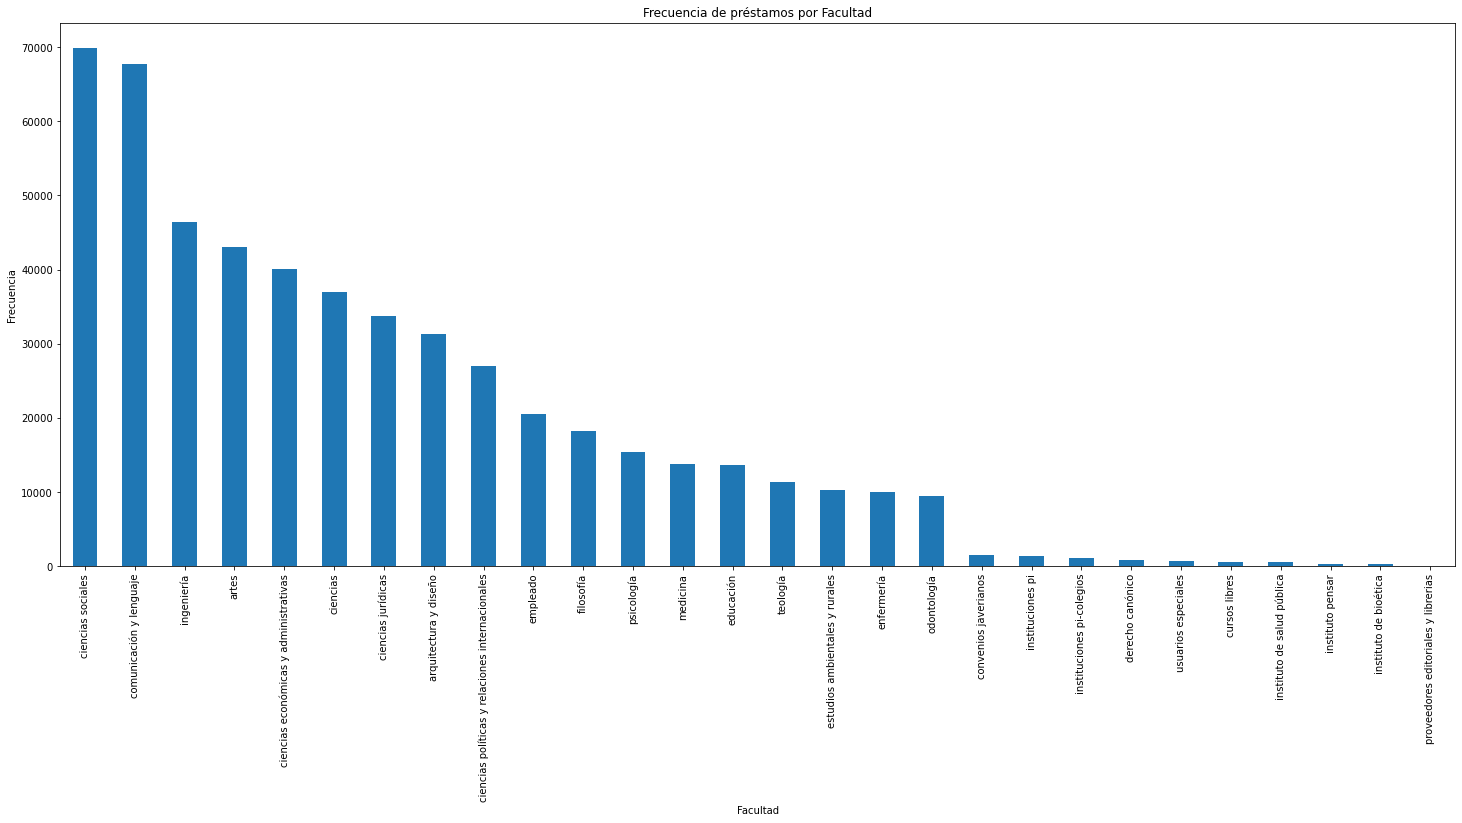

In [59]:
histograma(dataset,col)

In [60]:
col = "Facultad"
descripcion(dataset,col)

Número de datos nulos: 0
Número de datos únicos: 28
Tipo de dato: <class 'str'>
Ejemplo: arquitectura y diseño


**Análisis:**Encontramos 28 valores diferentes, la mayoría relacionada con los programas de estudio que ofrece la universidad. La facultad con mayor número de prestamos es ciencias sociales seguida por comunicación y lenguaje. De manera contraria odontología y enfermería no tienen un amplio número de prestamos.

### Col: ID de usuario ok
**Descripción:** ID único para cada usuario. este fue generado usando una función Hash para anonimizar los datos.

In [61]:
col = "ID de usuario ok"
descripcion(dataset,col)

Número de datos nulos: 0
Número de datos únicos: 25363
Tipo de dato: <class 'str'>
Ejemplo: c361c772cd0220bb16dcfb2ad803e4903334ab94


# Limpieza

### Estandarización nombres columnas
Comenzaremos estandirando los nombres de las columnas, así como cambiando el nombre de las columnas sobre las cuales se va a realizar joins. Todos los nombres se pondrán en minuscula, sin tildes, ni espacios, pasando al estandar de camelCase.

In [62]:
datasetPrestamos.columns

Index(['row ID', 'Mes', 'Fecha', 'Hora', 'Transacción',
       'Biblioteca Transacción', 'ID Ítem', 'Numero de Ubicación', 'Dewey',
       'Biblioteca', 'Ubicación', 'Tipo de ítem', 'Llaves', 'Perfil',
       'Categoría 1', 'Programa', 'Facultad', 'ID de usuario ok'],
      dtype='object')

In [63]:
nombresNuevos = {'row ID':'RowID',
 'Transacción':'Transaccion',
 'Biblioteca Transacción':'BibliotecaTransaccion',
  'ID Ítem':'IDItem',
  'Numero de Ubicación':'NumeroUbicacion',
  'Ubicación':'Ubicacion',
  'Tipo de ítem':'TipoItem',
  'Llaves':'Llave',
 'Categoría 1':'Caterogoria1',
 'ID de usuario ok':'IDUsuario'}

In [64]:
prestamosLimpio = datasetPrestamos.rename(columns=nombresNuevos)

In [65]:
prestamosLimpio.columns

Index(['RowID', 'Mes', 'Fecha', 'Hora', 'Transaccion', 'BibliotecaTransaccion',
       'IDItem', 'NumeroUbicacion', 'Dewey', 'Biblioteca', 'Ubicacion',
       'TipoItem', 'Llave', 'Perfil', 'Caterogoria1', 'Programa', 'Facultad',
       'IDUsuario'],
      dtype='object')

### Eliminacion Columnas
Se eliminarán las columnas que nos nos ofrecen información útil para los algoritmos de recomendación ni ofrecen información que pueda ser útil para los usuarios.

Las columnas a eliminar son:
* BibliotecaTransaccion: tiene único valor
* Biblioteca: tiene único valor
* Hora: No ofrece información útil
* Transaccion: No ofrece información útil
* Caterogoria1: No ofrece información adicional

In [66]:
prestamosLimpio = prestamosLimpio.drop(['BibliotecaTransaccion',
                                        'Biblioteca',
                                        'Hora',
                                        'Transaccion',
                                        'Caterogoria1'],axis=1)

In [67]:
prestamosLimpio.columns

Index(['RowID', 'Mes', 'Fecha', 'IDItem', 'NumeroUbicacion', 'Dewey',
       'Ubicacion', 'TipoItem', 'Llave', 'Perfil', 'Programa', 'Facultad',
       'IDUsuario'],
      dtype='object')

### Eliminación Tipos de ítems
Para el contexto del material solo nos interesa recomendar cierto tipo de material bibliográfico. Como se pudo observar los prestamos están compuestos no solo de libros, sino también de video, grabaciones, mapas, entre otros.
A partir del análisis con expertos se decidió por centrarnos únicamente en estos tipos de materiales:
* 'LIBRO'
* 'LITERATURA'
* 'REFERENCIA'
* 'RESERVA'

In [68]:
prestamosLimpio = prestamosLimpio[prestamosLimpio['TipoItem'].isin([
'LIBRO',
'LITERATURA',
'REFERENCIA',
'RESERVA',
])]
prestamosLimpio.shape

(493087, 13)

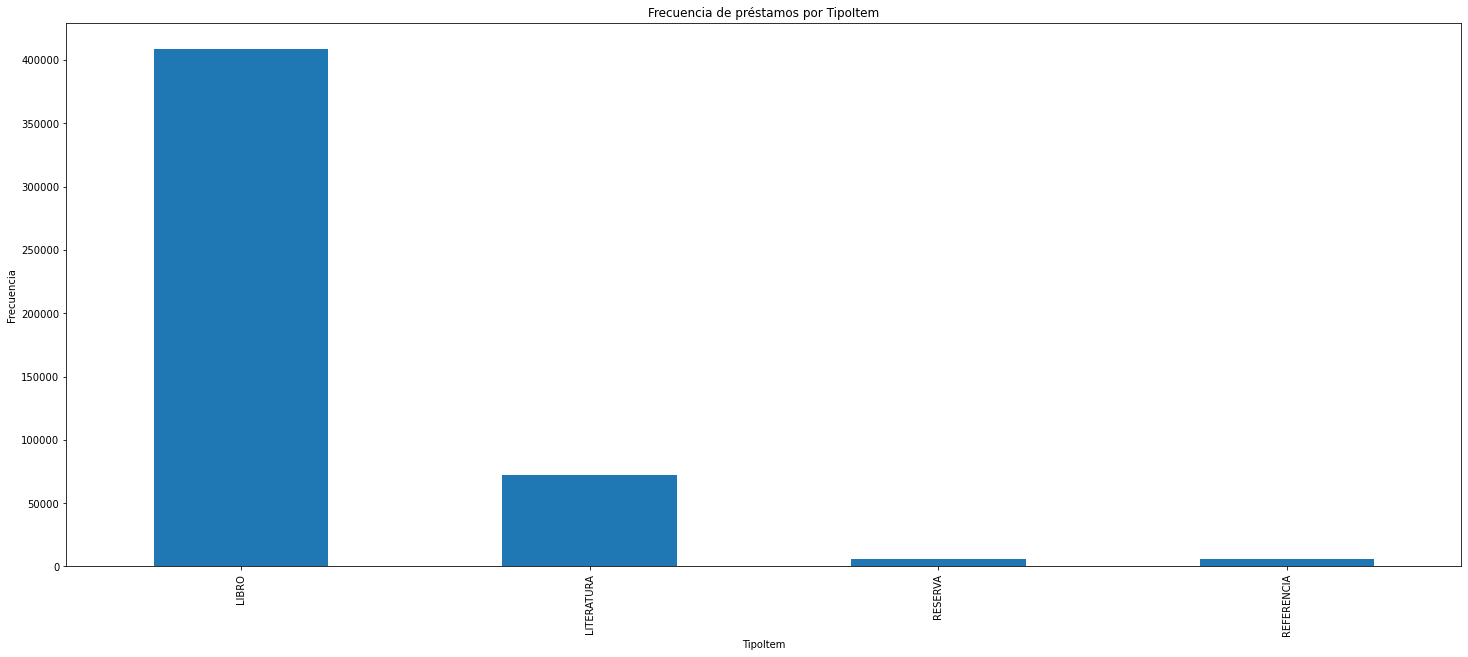

In [69]:
histograma(prestamosLimpio,'TipoItem')

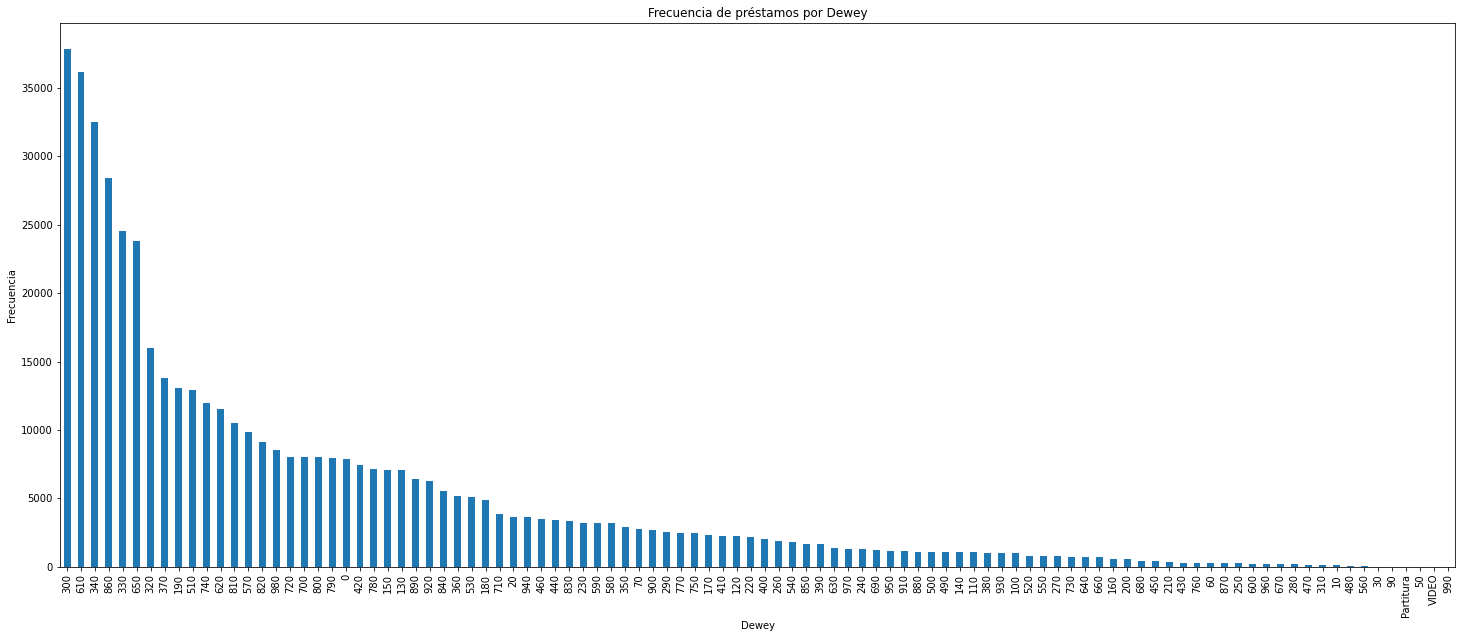

In [70]:
histograma(prestamosLimpio,'Dewey')

## Columna derivada: year
Obtenedremos una nueva columan a partir de fecha que nos indique solamente el año en el que se realizó el prestamo. 

In [71]:
prestamosLimpio['Year']=prestamosLimpio['Fecha'].apply(lambda x: str(x)[0:4])

In [72]:
col = "Year"
descripcion(prestamosLimpio,col)

Número de datos nulos: 0
Número de datos únicos: 4
Tipo de dato: <class 'str'>
Ejemplo: 2019


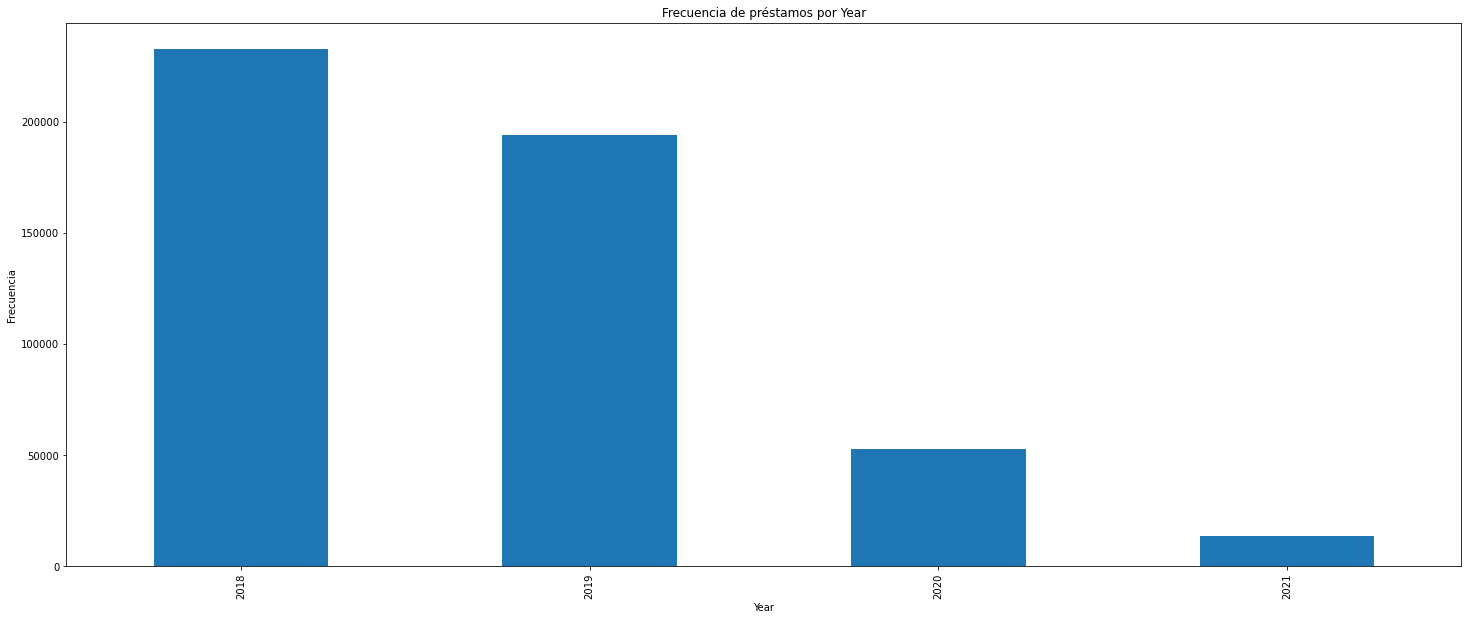

In [73]:
histograma(prestamosLimpio,col)

In [74]:
frecuencias(prestamosLimpio,col)

Year,Procentaje (%)
2018,47.214386
2019,39.350459
2020,10.697098
2021,2.738056


* *Podemos apreciar que los años 2020 y 2021 tienen un número de prestamos mucho menor (por debajo de la mitad) de los prestamos registrados en el 2019, resultados esperados debido a la influencia de la pandemia y sus restricciones (consultado con experto del negocio)*

#Análisis pos-limpieza
Finalmente realizaremos algunos análisis adicionales agrupando por cierto atributo o tratando de entender la correlación que puede haber entre dos o más atributos del dataset.

In [75]:
prestamosLimpio.columns

Index(['RowID', 'Mes', 'Fecha', 'IDItem', 'NumeroUbicacion', 'Dewey',
       'Ubicacion', 'TipoItem', 'Llave', 'Perfil', 'Programa', 'Facultad',
       'IDUsuario', 'Year'],
      dtype='object')

## IDUsuario vs Número de prestamos
Análizaremos cuales son los usuarios que más piden prestado material de la biblioteca así como las frecuencias y usuarios atípicos debido al número total de prestamos.

In [76]:
prestamosUsuario = prestamosLimpio.groupby(['IDUsuario'])['RowID'].count().reset_index(name='count').sort_values(['count'], ascending=False)
prestamosUsuario

,IDUsuario,count
10188,69c8887e954b39caa50b2ad21c66bad0b1c7715a,3350
17938,bb5bf4c8c0fe905ef90e3631b859f06e1ade76dc,1355
10954,723aa8e7571542402d55e90f6f74ccecc5a2ae3d,918
13626,8e51720745342c49a4cb16170f79681a956800f3,873
2746,1d40e1bd4bd75e8a262640b1e6f1cc62c2de2548,873
...,...,...
17623,b82594b5bf02ffa4baa35f5e173283a14095e3d5,1
17621,b81f019cb9393e730c1d09ac2696634611015234,1
10783,7028a175fac8b40b9f06859aa467659658126de4,1
10784,7029603853af4631c8f52fd2f1187a56fb5d1d1b,1


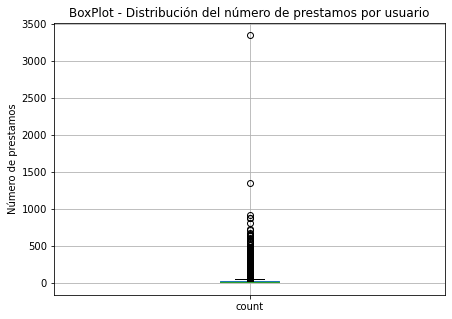

In [77]:
plt.figure(figsize=(7, 5))
plt.title("BoxPlot - Distribución del número de prestamos por usuario")
plt.ylabel("Número de prestamos")
boxplot = prestamosUsuario.boxplot(column = ['count'])

Como se puede notar en la gráfico hay un usuario en especifico que tiene más de 3000 prestamos. Esto se tomará como un dato atípico y se borrará del set de datos.

In [78]:
prestamosLimpio = prestamosLimpio[prestamosLimpio['IDUsuario'] != "69c8887e954b39caa50b2ad21c66bad0b1c7715a"]

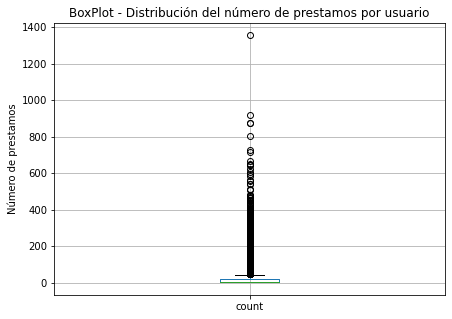

In [79]:
prestamosUsuario = prestamosLimpio.groupby(['IDUsuario'])['RowID'].count().reset_index(name='count').sort_values(['count'], ascending=False)
prestamosUsuario
plt.figure(figsize=(7, 5))
plt.title("BoxPlot - Distribución del número de prestamos por usuario")
plt.ylabel("Número de prestamos")
boxplot = prestamosUsuario.boxplot(column = ['count'])

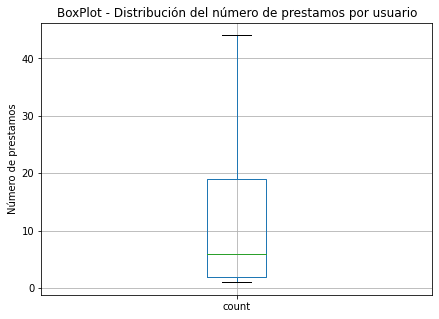

In [80]:
plt.figure(figsize=(7, 5))
plt.title("BoxPlot - Distribución del número de prestamos por usuario")
plt.ylabel("Número de prestamos")
boxplot = prestamosUsuario.boxplot(column = ['count'], showfliers=False)

In [81]:
prestamosUsuario.describe()

,count
count,24414.000000
mean,20.059679
std,43.702920
min,1.000000
25%,2.000000
50%,6.000000
75%,19.000000
max,1355.000000


**Análisis**: al agrupar por usuarios y realizar el conteo de cuantos prestamos tienen podemos notar una media de 20 prestamos en el periodo de 4 años, aunque el 50% de los estudiantes solo cuentan con 6 prestamos o menos. También podemos notar que hay estudiantes con un número elevado de prestamos. Se eligió eliminar el primero de estos para no introducir ruido a los datos ni experimentos. 

## Libros más prestados 

In [82]:
frecuenciaItem = prestamosLimpio.groupby(['Llave'])['RowID'].count().reset_index(name='count').sort_values(['count'], ascending=False)
frecuenciaItem

,Llave,count
58039,893295,675
9146,312287,450
53183,861744,430
44659,806204,345
28637,682862,325
...,...,...
70324,341812,1
10310,317622,1
25651,639152,1
70321,341802,1


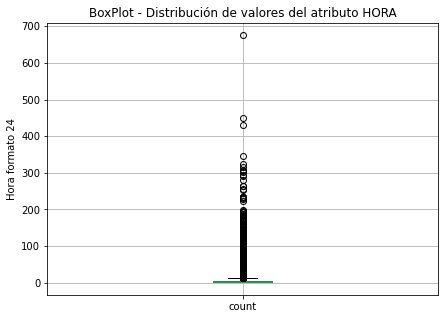

In [83]:
plt.figure(figsize=(7, 5))
plt.title("BoxPlot - Distribución de valores del atributo HORA")
plt.ylabel("Hora formato 24")
boxplot = frecuenciaItem.boxplot(column = ['count'])

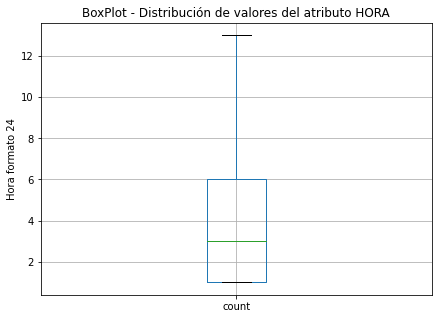

In [84]:
plt.figure(figsize=(7, 5))
plt.title("BoxPlot - Distribución de valores del atributo HORA")
plt.ylabel("Hora formato 24")
boxplot = frecuenciaItem.boxplot(column = ['count'], showfliers=False)

In [85]:
frecuenciaItem.describe()

,count
count,91334.000000
mean,5.362045
std,9.688578
min,1.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,675.000000


In [86]:
frecuenciaItem = prestamosLimpio.groupby(['Llave','Dewey'])['RowID'].count().reset_index(name='count').sort_values(['count'], ascending=False)
frecuenciaItem

,Llave,Dewey,count
59423,893295,610,675
9295,312287,180,450
54402,861744,330,429
45654,806204,530,345
29213,682862,530,324
...,...,...,...
29699,687113,980,1
70320,313132,900,1
29700,687117,350,1
70317,313014,920,1


**Análisis:** Al agrupar por llave de libros podemos notar que hay libros que son más populares que otros en la comunidad educativa. No se eliminará ningún outliers ya que simplemente se trata de libros con gran popularidad. 

Los deweys a los cuales pertenecen estos libros son el 610(medicina), 180(filosofía oriental) y 330(economía).

## Facultad vs Dewey

In [87]:
facultadDewey = prestamosLimpio.groupby(['Facultad','Dewey'])['RowID'].count().reset_index(name='count').sort_values(['count'], ascending=False)
facultadDewey.head(10)

,Facultad,Dewey,count
399,ciencias jurídicas,340,19074
582,ciencias sociales,300,11067
338,ciencias económicas y administrativas,650,9940
1391,ingeniería,620,8683
305,ciencias económicas y administrativas,330,7861
641,ciencias sociales,860,7749
1686,medicina,610,7405
241,ciencias,610,6942
1766,odontología,610,6862
679,comunicación y lenguaje,300,6721


**Análisis:** Podemos notar  que cada facultad está más o menos sesgada hacia un dewey en especifico. 
* ciencias jurídicas -> leyes
* ciencias sociales -> ciencias sociales, socialogía y antropología. 
* ciencias económicas y administrativas -> administración y relaciones públicas. 


## Dewey vs Año
Se analizará cuales son los deweys más populares por año. 

In [88]:
deweyanio = prestamosLimpio.groupby(['Year','Dewey'])['RowID'].count().reset_index(name='count').sort_values(['count'], ascending=False)
display(deweyanio[deweyanio.Year == "2018"].head(3))
display(deweyanio[deweyanio.Year == "2019"].head(3))
display(deweyanio[deweyanio.Year == "2020"].head(3))
display(deweyanio[deweyanio.Year == "2021"].head(3))

,Year,Dewey,count
24,2018,300,17832
56,2018,610,17429
28,2018,340,14364


,Year,Dewey,count
123,2019,300,14634
156,2019,610,13363
127,2019,340,13012


,Year,Dewey,count
252,2020,610,4120
220,2020,300,4081
224,2020,340,3596


,Year,Dewey,count
317,2021,340,1238
313,2021,300,1114
344,2021,610,877


**Análisis:** Notamos que cada año hay diferentes tendencias frente a las temáticas en que la comunidad educativa está interesada. Igual se aprecia que deweys como el 610(medicina) o 300(ciencias sociales) se mantienen en el top 3 sin importar el año. 

# Conclusiones y decisiones
A nivel de la estrucutración y problemas de integridad del dataset se tomaron las siguientes decisiones:
* Eliminar tipo de items no asociados a libros.
* Formatear columna Fecha a un TimeStamp
* Formatear el nombre de las columnas para seguir un mismo formato
* Estandrizar la columna de Facultad
* Eliminar columnas 'BibliotecaTransaccion','Biblioteca','Hora','Transaccion',  'Caterogoria1'.
* Crear la columna derivada Year.

Algunas conclusiones que podemos sacar del dataset fueron:
* La mayoría de los prestamos pertenecen a los años 2018 y 2019.
* Las facultades están cesgadas a sacar material relacionado con su disciplina academica. 
* La popularidad del material por dewey de manetiene a través de los años. 
* Hay un desbalance en la cantidad de material prestado por cada facultad o programa de la universidad. 
* La mayoría de usuarios prestan alrededor de 6 libros en un periodo de 4 años. 

El dataset de manera general no contenía problemas de integridad, nulos o datos faltantes lo cual ayudó en gran manera a que el proceso de limpieza fuera lo más sencillo posible. Así 


# Exportación

In [89]:
prestamosLimpio.to_json(r'C:\Users\johan\Desktop\GitKraken\DataOutOfGit\Limpieza\PRESTAMOS-BGENERAL.json')